In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_rows = 50

In [3]:
df = sns.load_dataset('mpg')

In [4]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [5]:
df['origin'].value_counts()

origin
usa       249
japan      79
europe     70
Name: count, dtype: int64

In [7]:
df_count = df.groupby('origin').count()
df_count

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,name
origin,,,,,,,,
europe,70,70,70,68,70,70,70,70
japan,79,79,79,79,79,79,79,79
usa,249,249,249,245,249,249,249,249


In [8]:
df.groupby('origin')[['horsepower', 'name']].count()

,horsepower,name
origin,,
europe,68,70
japan,79,79
usa,245,249


In [18]:
df.groupby('origin').mean(numeric_only = True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
origin,,,,,,,
europe,27.89,4.16,109.14,80.56,2423.30,16.79,75.81
japan,30.45,4.10,102.71,79.84,2221.23,16.17,77.44
usa,20.08,6.25,245.90,119.05,3361.93,15.03,75.61


In [22]:
df_mean = df.groupby(['origin'])[['mpg', 'weight','acceleration']].mean(numeric_only = True)
df_mean

,mpg,weight,acceleration
origin,,,
europe,27.89,2423.30,16.79
japan,30.45,2221.23,16.17
usa,20.08,3361.93,15.03


In [23]:
df_mean.index

Index(['europe', 'japan', 'usa'], dtype='object', name='origin')

In [32]:
df_yco = df.groupby(['model_year', 'cylinders', 'origin'])[['name', 'origin']].count()
df_yco

name  origin
model_year cylinders origin              
70         4         europe     5       5
                     japan      2       2
           6         usa        4       4
           8         usa       18      18
71         4         europe     4       4
...                           ...     ...
81         8         usa        1       1
82         4         europe     2       2
                     japan      9       9
                     usa       17      17
           6         usa        3       3

[76 rows x 2 columns]

In [35]:
df_yco.loc[(76, 8, 'usa')], (80, 6, 'japan')

(name      9
 origin    9
 Name: (76, 8, usa), dtype: int64,
 (80, 6, 'japan'))

In [37]:
df_yco.xs(key=4, level='cylinders').xs(key='usa', level='origin')

,name,origin
model_year,,
71,5,5
72,5,5
73,2,2
74,3,3
75,2,2
...,...,...
78,6,6
79,7,7
80,6,6


In [38]:
df = sns.load_dataset('tips')

In [39]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [46]:
df_sum = df.groupby(['day', 'time'])[['total_bill', 'tip']].sum().reset_index()

C:\Users\user\AppData\Local\Temp\ipykernel_20532\557036496.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_sum = df.groupby(['day', 'time'])[['total_bill', 'tip']].sum().reset_index()


In [47]:
df_sum

,day,time,total_bill,tip
0,Thur,Lunch,1077.55,168.83
1,Thur,Dinner,18.78,3.00
2,Fri,Lunch,89.92,16.68
3,Fri,Dinner,235.96,35.28
4,Sat,Lunch,0.00,0.00
5,Sat,Dinner,1778.40,260.40
6,Sun,Lunch,0.00,0.00
7,Sun,Dinner,1627.16,247.39


Столбчитая диограмма

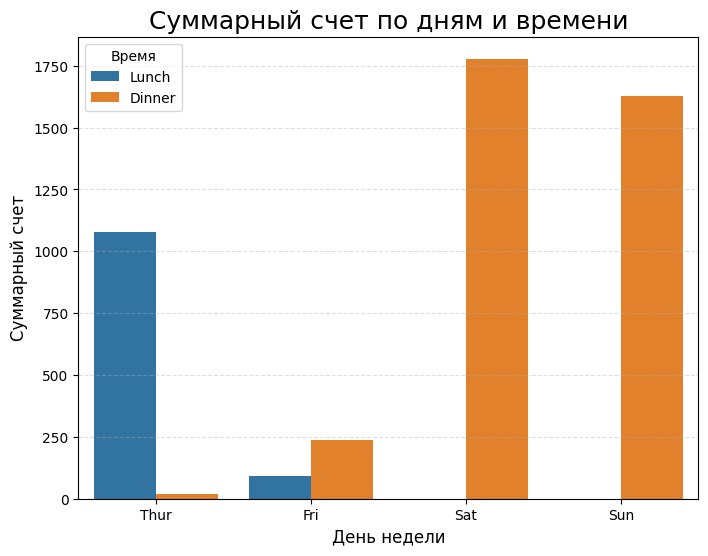

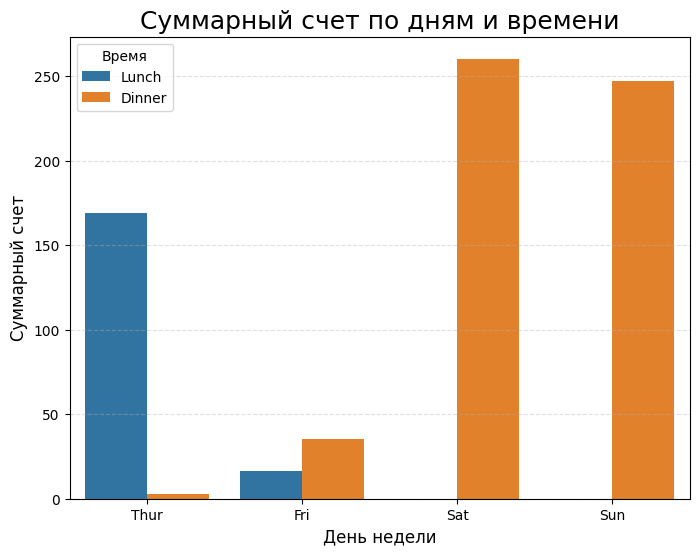

In [68]:
plt.figure(figsize=(8,6))
plt.title('Суммарный счет по дням и времени', fontsize=18)
plt.xlabel('День недели', fontsize=12)
plt.ylabel('Суммарный счет', fontsize=12)
plt.grid(alpha=0.4, linestyle='--')
sns.barplot(data=df_sum, x='day', y='total_bill', hue='time')
plt.legend(title='Время')


plt.figure(figsize=(8,6))
plt.title('Суммарный счет по дням и времени', fontsize=18)
plt.xlabel('День недели', fontsize=12)
plt.ylabel('Суммарный счет', fontsize=12)
plt.grid(alpha=0.4, linestyle='--')

sns.barplot(data=df_sum, x='day', y='tip', hue='time')
plt.legend(title='Время')

In [76]:
pd.DataFrame(np.random.normal(loc=50, scale=5, size=25))

,0
0,49.59
1,44.65
2,47.66
3,54.05
4,55.87
5,49.11
6,48.28
7,54.00
8,50.72
9,50.66
